In [ ]:
!pip install tensorflow

In [2]:
import tensorflow as tf

In [3]:
mf=tf.keras.datasets.mnist

In [4]:
mf

<module 'keras.api._v2.keras.datasets.mnist' from 'C:\\Users\\MARI\\anaconda3\\lib\\site-packages\\keras\\api\\_v2\\keras\\datasets\\mnist\\__init__.py'>

In [6]:
print(tf.__version__)

2.12.0


In [7]:
print(tf.keras.__version__)

2.12.0


In [ ]:
mf.load_data()

In [22]:
(X_train,y_train),(X_test,y_test)=mf.load_data()

In [23]:
X_train.shape

(60000, 28, 28)

In [24]:
X_test.shape

(10000, 28, 28)

In [25]:
X_train[0].shape

(28, 28)

In [26]:
X_valid,X_train=X_train[:5000]/255.,X_train[5000:]/255.
y_valid,y_train=y_train[:5000]/255.,y_train[5000:]/255.

X_test=X_test/255.

In [27]:
X_valid.shape

(5000, 28, 28)

In [28]:
X_train.shape

(55000, 28, 28)

In [32]:
import matplotlib.pyplot as plt

In [31]:
import pandas as pd

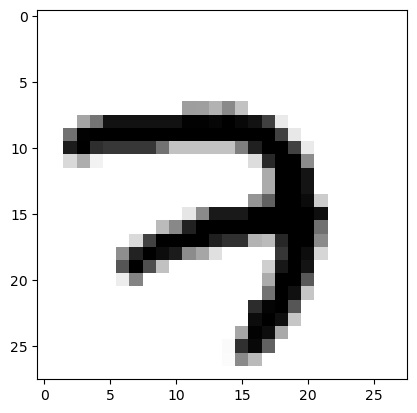

In [33]:
plt.imshow(X_train[0],cmap='binary')

In [34]:
import seaborn as sns

<Axes: >

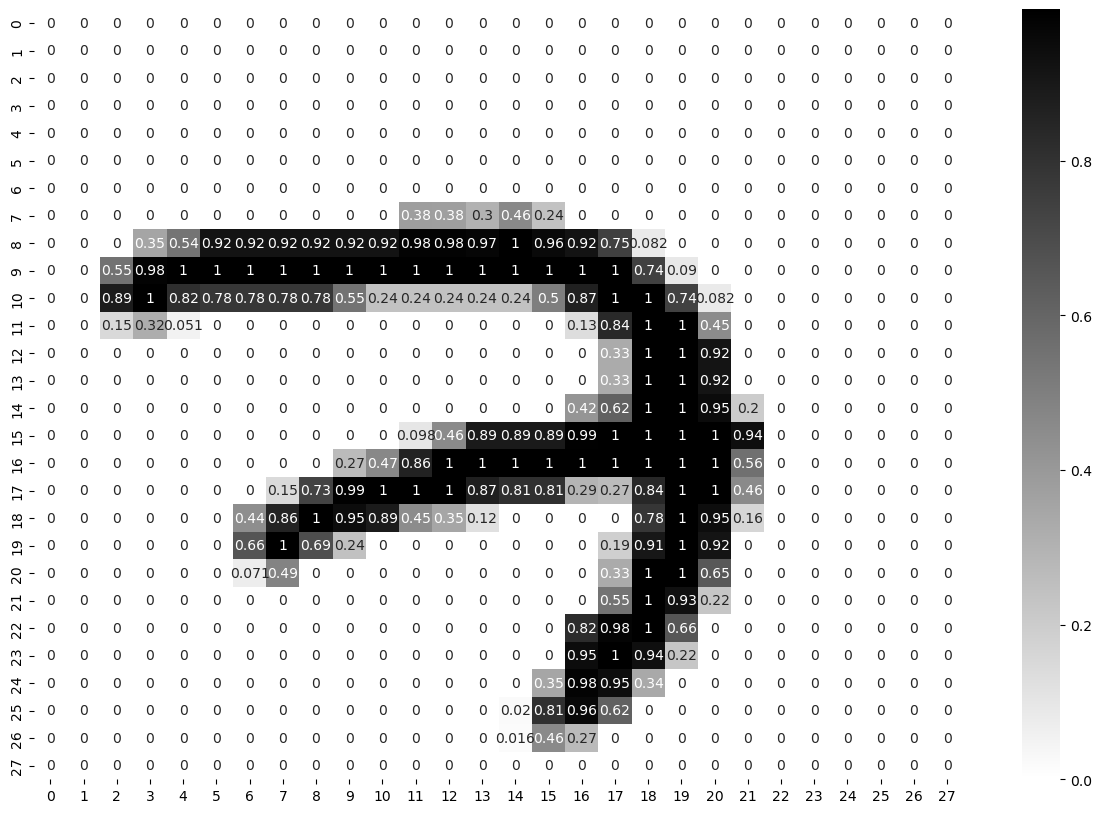

In [97]:
plt.figure(figsize=(15,10))
sns.heatmap(X_train[0],annot=True,cmap='binary')

In [44]:
##creating layer of ANN
## Name also import other wise you get error

In [42]:
layers=[
tf.keras.layers.Flatten(input_shape=[28,28],name='inputLayer'),
tf.keras.layers.Dense(300,activation='relu', name='hiddenlayer1'),
tf.keras.layers.Dense(100,activation='relu', name='hiddenlayer2'),   
tf.keras.layers.Dense(10,activation='softmax', name='outputLayer'),  
]

In [98]:
model=tf.keras.models.Sequential(layers)

In [99]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputLayer (Flatten)        (None, 784)               0         
                                                                 
 hiddenlayer1 (Dense)        (None, 300)               235500    
                                                                 
 hiddenlayer2 (Dense)        (None, 100)               30100     
                                                                 
 outputLayer (Dense)         (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [56]:
hidden1=model.layers[1]

In [57]:
hidden1.name

'hiddenlayer1'

In [61]:
hidden1.get_weights()[1].shape

(300,)

In [62]:
weights,bias=hidden1.get_weights()

In [64]:
weights.shape

(784, 300)

In [65]:
bias.shape

(300,)

In [104]:
LossFunction="sparse_categorical_crossentropy" #sparse_categorical_crossentropy
optimizer="SGD"
Metric=["accuracy"]

In [105]:
model.compile(optimizer=optimizer,
                  metrics=Metric,loss=LossFunction)

In [106]:
##training
epochs=30
validation=(X_valid,y_valid)

In [107]:
history=model.fit(X_train,y_train,epochs=epochs,validation_data=validation,batch_size=30)

Epoch 1/30
1834/1834 [==============================] - 8s 4ms/step - loss: 1.5695e-05 - accuracy: 0.0990 - val_loss: 1.2075e-05 - val_accuracy: 0.0958
Epoch 2/30
1834/1834 [==============================] - 7s 4ms/step - loss: 1.5173e-05 - accuracy: 0.0990 - val_loss: 1.1662e-05 - val_accuracy: 0.0958
Epoch 3/30
1834/1834 [==============================] - 7s 4ms/step - loss: 1.4684e-05 - accuracy: 0.0990 - val_loss: 1.1275e-05 - val_accuracy: 0.0958
Epoch 4/30
1834/1834 [==============================] - 8s 4ms/step - loss: 1.4225e-05 - accuracy: 0.0990 - val_loss: 1.0912e-05 - val_accuracy: 0.0958
Epoch 5/30
1834/1834 [==============================] - 7s 4ms/step - loss: 1.3793e-05 - accuracy: 0.0990 - val_loss: 1.0571e-05 - val_accuracy: 0.0958
Epoch 6/30
1834/1834 [==============================] - 7s 4ms/step - loss: 1.3387e-05 - accuracy: 0.0990 - val_loss: 1.0251e-05 - val_accuracy: 0.0958
Epoch 7/30
1834/1834 [==============================] - 7s 4ms/step - loss: 1.3003e-05 -

## Tensor board callback function

In [108]:
logfolder="logs"
%load_ext tensorboard

In [109]:
tb_cb=tf.keras.callbacks.TensorBoard(log_dir=logfolder,histogram_freq=1)

### Early stopping call back

In [111]:
early_stopping_cb=tf.keras.callbacks.EarlyStopping(patience=5)

## Model checking call back

In [115]:
ckpt_path="model_ckpt.h5"
checkpoint_cb=tf.keras.callbacks.ModelCheckpoint(ckpt_path,save_best_only=True)

In [112]:
epochs=30
validation=(X_valid,y_valid)

In [116]:
history=model.fit(X_train,y_train,epochs=epochs,validation_data=validation,batch_size=32,
                 callbacks=[tb_cb,early_stopping_cb,checkpoint_cb])

Epoch 1/30
1719/1719 [==============================] - 9s 5ms/step - loss: 7.6850e-06 - accuracy: 0.0990 - val_loss: 5.7737e-06 - val_accuracy: 0.0958
Epoch 2/30
1719/1719 [==============================] - 8s 4ms/step - loss: 7.5635e-06 - accuracy: 0.0990 - val_loss: 5.6789e-06 - val_accuracy: 0.0958
Epoch 3/30
1719/1719 [==============================] - 8s 5ms/step - loss: 7.4452e-06 - accuracy: 0.0990 - val_loss: 5.5867e-06 - val_accuracy: 0.0958
Epoch 4/30
1719/1719 [==============================] - 8s 5ms/step - loss: 7.3307e-06 - accuracy: 0.0990 - val_loss: 5.4972e-06 - val_accuracy: 0.0958
Epoch 5/30
1719/1719 [==============================] - 8s 5ms/step - loss: 7.2200e-06 - accuracy: 0.0990 - val_loss: 5.4107e-06 - val_accuracy: 0.0958
Epoch 6/30
1719/1719 [==============================] - 8s 5ms/step - loss: 7.1127e-06 - accuracy: 0.0990 - val_loss: 5.3272e-06 - val_accuracy: 0.0958
Epoch 7/30
1719/1719 [==============================] - 8s 4ms/step - loss: 7.0080e-06 -

In [76]:
import pandas as pd

In [77]:

df=pd.DataFrame(history.history)

In [78]:
df

,loss,accuracy,val_loss,val_accuracy
0,0.014011,0.098945,0.000534,0.0958
1,0.000405,0.098982,0.000247,0.0958
2,0.000226,0.098982,0.000157,0.0958
3,0.000157,0.098982,0.000115,0.0958
4,0.000119,0.098982,0.000090,0.0958
5,0.000096,0.098982,0.000073,0.0958
6,0.000080,0.098982,0.000062,0.0958
7,0.000069,0.098982,0.000053,0.0958
8,0.000060,0.098982,0.000047,0.0958
9,0.000054,0.098982,0.000042,0.0958


<Axes: >

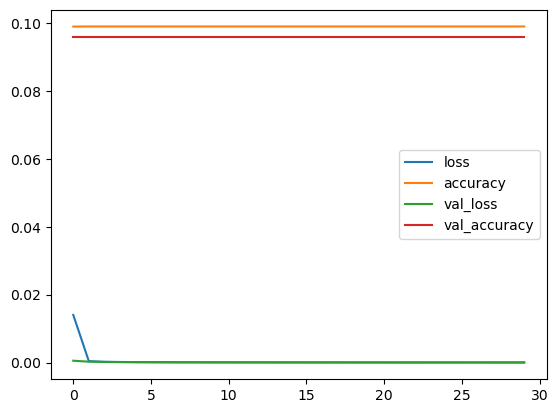

In [79]:
df.plot()

In [80]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 18.4455 - accuracy: 0.0980


[18.44550895690918, 0.09799999743700027]

In [96]:
x_new=X_test[:3]
x_new

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]])

In [83]:
actual=y_test[:3]
actual

array([7, 2, 1], dtype=uint8)

<Axes: >

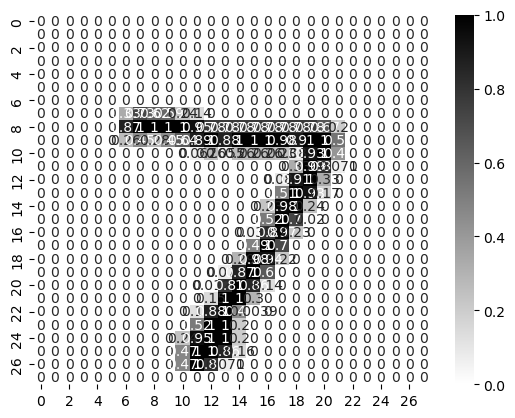

In [87]:
sns.heatmap(X_test[0],annot=True,cmap='binary')

In [89]:
y_prob=model.predict(x_new)
y_prob.round(2)

1/1 [==============================] - 0s 25ms/step


array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [90]:
y_prob

array([[9.99996305e-01, 1.94265610e-07, 5.66237929e-07, 9.53803578e-07,
        2.20872423e-07, 1.89106046e-07, 2.24708458e-07, 5.54647613e-07,
        2.34853246e-07, 5.07286927e-07],
       [9.99999881e-01, 4.26333369e-09, 1.33218823e-08, 2.99750944e-08,
        7.82797649e-09, 5.13232257e-09, 1.03391988e-08, 2.02673540e-08,
        5.46427703e-09, 1.83821829e-08],
       [9.99935865e-01, 3.99351893e-06, 9.52695518e-06, 1.20493924e-05,
        3.74982847e-06, 3.09501797e-06, 4.59448256e-06, 1.12055495e-05,
        5.26296571e-06, 1.07641818e-05]], dtype=float32)

In [91]:
import numpy as np

In [92]:
y_pred=np.argmax(y_prob, axis=-1)

In [93]:
y_pred

array([0, 0, 0], dtype=int64)

In [94]:
actual

array([7, 2, 1], dtype=uint8)

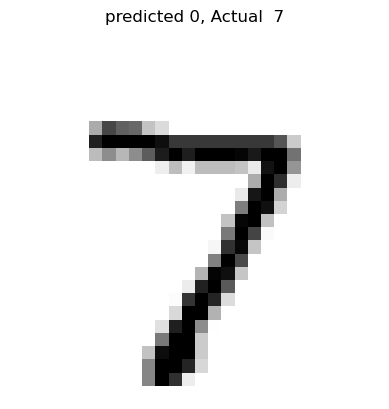

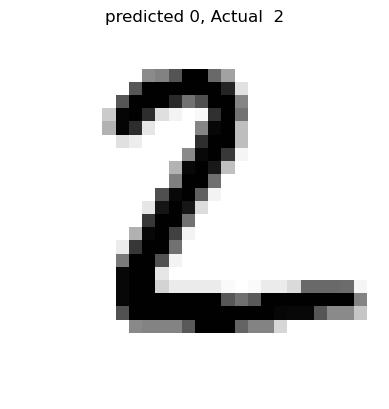

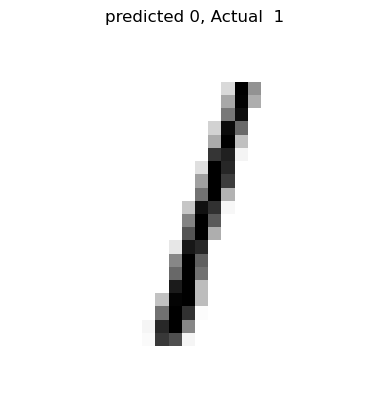

In [95]:
for data,pred,actual in zip(x_new,y_pred,actual):
    plt.imshow(data,cmap='binary')
    plt.title(f"predicted {pred}, Actual  {actual}")
    plt.axis('off')
    plt.show()